In [10]:
import os

import pandas as pd
import numpy as np

from scipy import stats

# from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, \
    mean_squared_log_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

RAND = 10

# Задача регресии

Amazon продает одежду онлайн. Клиенты заходят на сайт, покупают одежду как при помощи мобильного приложения, так и веб-сайта. 
Компания пытается понять, на чем лучше сосредоточить свое внимание: на мобильном приложении или на десктоп.

Для этого необходимо построить модель регресии и далее посмотреть наиболее влиятельные показатели.

In [11]:
df = pd.read_csv('Ecommerce.csv')

In [12]:
df[:5]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
df.shape

(500, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
df.describe(include=['object'])

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


Распределение целевой переменной (распределение вероятности)

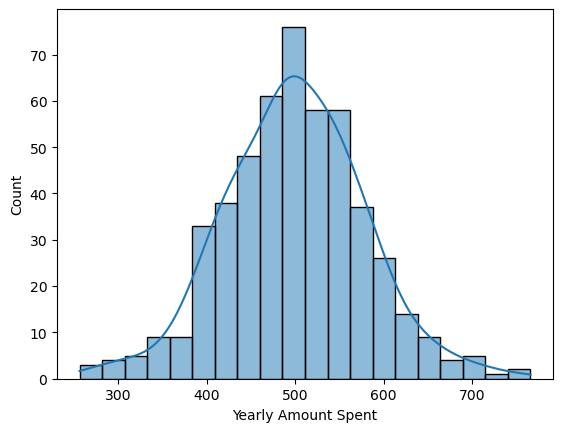

In [17]:
sns.histplot(df['Yearly Amount Spent'], kde=True);

Проанализируем целевую переменную на предмет нормального распредления

In [18]:
test_shapiro = stats.shapiro(df['Yearly Amount Spent'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.9961366057395935, pvalue=0.2643594741821289)
Распределение нормальное


<div class="alert alert-block alert-warning"> 
Если целевая переменная распределена не нормально, то как один из вариантов ее можно прологарифмировать
    
```python
df.target_log = np.log(df.target)
```

Если целевая переменная распределена не нормально и содержит отрицательные значения (либо вместо 1 другую константу (положительное число)

```python
df.target_log = np.log(df.target + 1)
```

</div>

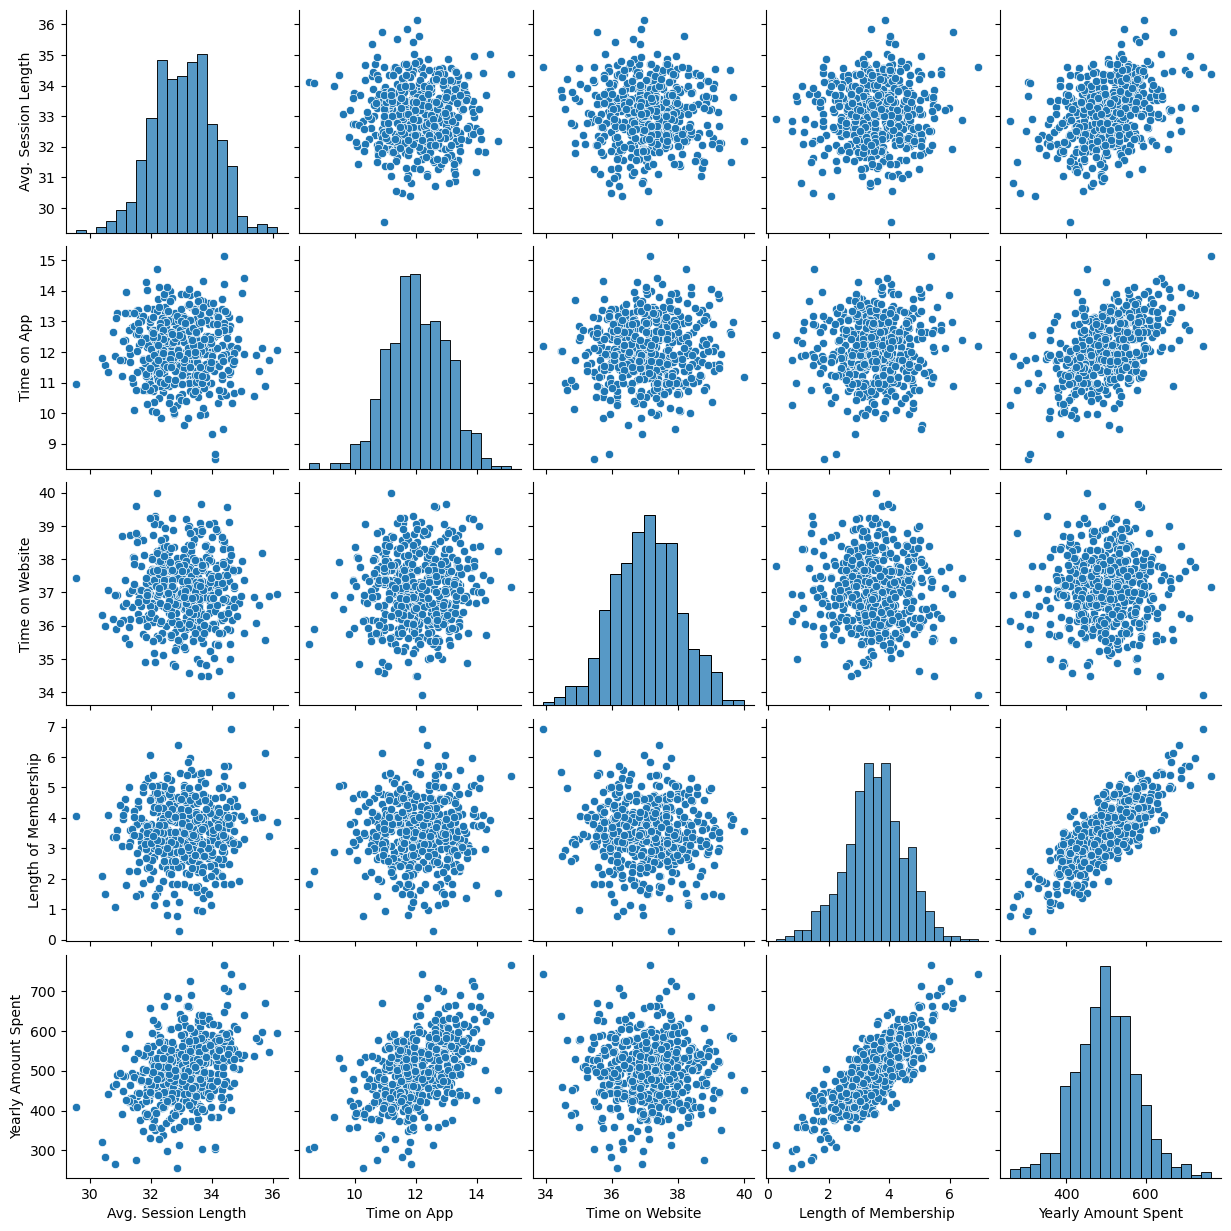

In [19]:
sns.pairplot(df);

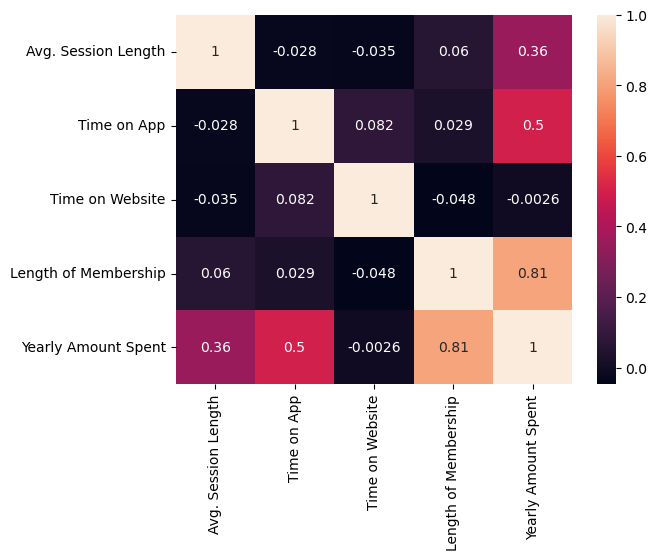

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [67]:
X = df.drop(columns=['Yearly Amount Spent', 'Email', 'Address', 'Avatar'],
            axis=1)
y = df['Yearly Amount Spent'].values

# разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RAND)

# стандартизация данных, только для линейных и метрических моделей (+ нейросети)
st = StandardScaler()
X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)

In [66]:
pd.DataFrame(st.transform(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419833,0.889908,-1.341180,-0.254179,-0.732017,0.542745,-0.377056,-0.192477,-0.328111,-1.124648,-0.064321,0.416936,-0.572487
1,-0.423389,2.012496,-1.233490,-0.254179,-1.336042,0.817347,-2.087211,1.150058,-1.000295,-0.875095,-1.366949,0.417040,-1.121411
2,-0.421880,2.844042,-1.170312,-0.254179,-1.361565,0.056223,-1.806916,1.334694,-0.664203,-0.457240,-1.134337,0.453875,-1.172080
3,-0.422620,1.180950,-1.474715,-0.254179,-1.097835,1.024790,-1.214393,2.362042,-1.000295,-0.468847,0.540470,0.380310,-1.000366
4,-0.264123,-0.482143,1.157222,-0.254179,2.662433,-1.266043,1.109572,-1.030336,-0.552173,-0.074206,-1.785651,-0.123168,0.039774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.407031,-0.482143,-0.262846,-0.254179,0.229318,-0.813846,-0.522526,-0.658096,-0.440142,-0.143848,0.307858,0.453875,-0.138978
123,-0.067022,-0.482143,1.157222,3.934242,2.662433,-1.267535,1.109572,-1.157541,-0.552173,-0.074206,-1.785651,0.453875,1.945524
124,-0.353173,-0.482143,-0.485405,-0.254179,-0.170529,-0.655652,0.765412,0.425647,-0.664203,-0.631346,1.145262,0.244971,0.255121
125,-0.415837,-0.482143,-1.072673,-0.254179,-0.408736,0.244265,0.545434,-0.533434,-0.552173,-0.695185,-0.901725,0.439266,-0.557005


In [65]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


Так как в особенности линейная регрессия (а также и другие линейные алгоритмы, которые будет проходить в последующих лекциях) чувствительна к масштабированию признаков при подборе параметров, необходимо привести признаки к единой шкале

In [25]:
X_train[:3]

,Avg. Session Length,Time on App,Time on Website,Length of Membership
305,33.302672,13.459222,36.339521,5.566385
107,32.063775,10.719150,37.712509,3.004743
350,33.304337,12.692661,37.333591,3.827376


In [26]:
X_train_std

array([[ 0.28194213,  1.45965377, -0.70505681,  2.15943703],
       [-0.97799733, -1.32633164,  0.64870178, -0.47115653],
       [ 0.28363481,  0.68024836,  0.2750906 ,  0.3736195 ],
       ...,
       [ 0.42986535, -0.12187533, -0.17752734, -0.69911636],
       [-1.47392227,  0.56559157,  0.03813068,  1.09719606],
       [ 0.89217909, -0.36070134,  0.28265865,  0.81479053]])

In [27]:
def r2_adjusted(y_true: np.ndarray, y_pred: np.ndarray,
                X_test: np.ndarray) -> float:
    """Коэффициент детерминации (множественная регрессия)"""
    N_objects = len(y_true)
    N_features = X_test.shape[1]
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (N_objects - 1) / (N_objects - N_features - 1)


def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean percentage error"""
    return np.mean((y_true - y_pred) / y_true) * 100


def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean absolute percentage error"""
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def wape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Weighted Absolute Percent Error"""
    return np.sum(np.abs(y_pred - y_true)) / np.sum(y_true) * 100


def huber_loss(y_true: np.ndarray, y_pred: np.ndarray, delta: float = 1.345):
    """Функция ошибки Хьюбера"""
    assert len(y_true) == len(y_pred), 'Разные размеры данных'
    huber_sum = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= delta:
            huber_sum += 0.5 * (y_true[i] - y_pred[i])**2
        else:
            huber_sum += delta * (abs(y_true[i] - y_pred[i]) - 0.5 * delta)
    huber_sum /= len(y_true)
    return huber_sum


def logcosh(y_true: np.ndarray, y_pred: np.ndarray):
    """функция ошибки Лог-Кош"""
    return np.sum(np.log(np.cosh(y_true - y_pred)))


def rmsle(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric 
    Логаритмическая ошибка средней квадратичной ошибки
    """
    try:
        return np.sqrt(mean_squared_log_error(y_true, y_pred))
    except:
        return None


def get_metrics(y_test: np.ndarray,
                y_pred: np.ndarray,
                X_test: np.ndarray,
                name: str = None,
                delta: float = 1.345):
    """Генерация таблицы с метриками"""
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    df_metrics['MAE'] = mean_absolute_error(y_test, y_pred)
    df_metrics['MSE'] = mean_squared_error(y_test, y_pred)
    df_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    df_metrics['RMSLE'] = rmsle(y_test, y_pred)
    df_metrics['R2 adjusted'] = r2_adjusted(y_test, y_pred, X_test)
    # df_metrics['Huber_loss'] = huber_loss(y_test, y_pred, delta)
    # df_metrics['Logcosh'] = logcosh(y_test, y_pred)
    df_metrics['MPE_%'] = mpe(y_test, y_pred)
    df_metrics['MAPE_%'] = mape(y_test, y_pred)
    df_metrics['WAPE_%'] = wape(y_test, y_pred)

    return df_metrics

## Реализация собственного алгоритма Linear Regression

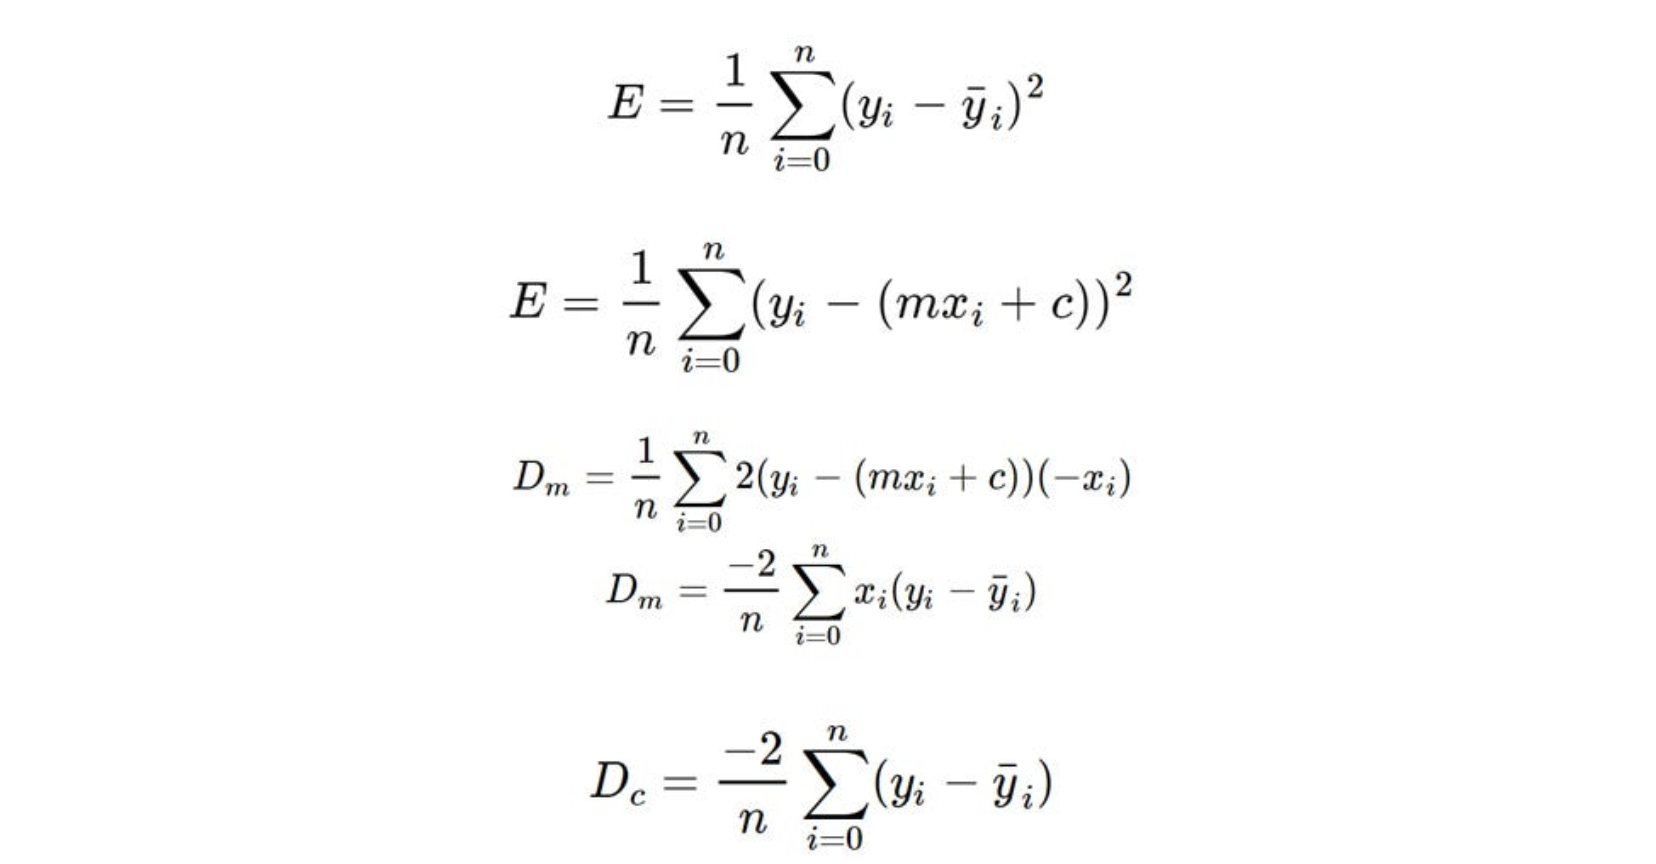

Подробный разбор https://dphi.tech/blog/tutorial-on-linear-regression-using-gradient-descent/

In [28]:
class OwnLinearRegression:
    def __init__(self,
                 learning_rate: float = 0.001,
                 eps: float = 0.001,
                 iters: int = 100):
        """
        Инициализация параметров

        :param learning_rate: скорость обучения (eta)
        :param eps: дельта разницы
        :param iters: кол-во итераций
        """
        self.learning_rate = learning_rate
        self.eps = eps
        self.iters = iters

    def mean_squared_error_cost(self, y_true: np.ndarray, y_pred: np.ndarray):
        """
        MSE функция потерь
        :param y_true: фактическое значение y (целевая переменная)
        :param y_pred: предсказанное значение алгоритма
        :return: значение ошибки
        """
        errors = (y_true - y_pred)
        return (errors**2).sum() / len(errors)

    def net_input(self, X: np.ndarray):
        """
        Получение вектора ответов путем перемножения
        вектора признаков на вектор весов
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X: np.ndarray):
        """
        Получение вектора ответов
        :param X: вектор признаков
        :return:
        """
        return self.net_input(X)

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Обучение модели
        :param X: вектор признаков
        :param y: вектор таргетов
        """
        self.w_ = np.zeros(1 + X.shape[1])
        # список с ошиками
        self.cost_ = []

        # Проходим по циклу n-раз:
        for i in tqdm_notebook(range(self.iters)):
            # Находим приближение вектора весов на предыдущей операции (n-1)
            w_pred = self.w_.copy()
            
            # Вычисляем вектор ответов на предыдущей итерации 
            # получаем ответы алгоритма
            output = self.net_input(X)
            # вычисляем предварительную разницу между реальными значениями y
            # и предсказанными значениями алгоритма
            errors = y - output

            # обновляем веса с 1 по n w1_n (пример выше с Dm - произодная, градиент)
            self.w_[1:] -= self.learning_rate * (-2 / X.shape[0]) * X.T.dot(errors)
            # обновляем нулевой вес - w0 (пример выше с Dс - произодная)
            self.w_[0] -= self.learning_rate * (-2 / X.shape[0]) * errors.sum()

            # вычисляем ошибку
            cost = self.mean_squared_error_cost(y, self.net_input(X))
            self.cost_.append(cost)

            # Проверяем условие останова
            if np.linalg.norm(self.w_ - w_pred, ord=2) < self.eps:
                break

In [29]:
lro = OwnLinearRegression(learning_rate=0.01, eps=0.001, iters=1000)
lro.fit(X_train_std, y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [68]:
lro.predict(X_test_std)

array([685.6430938 , 497.58786578, 599.59130096, 610.16817089,
       584.95437485, 478.3881547 , 543.78357574, 575.56017883,
       753.0013258 , 468.68606606, 506.74986337, 559.21849088,
       553.56712655, 494.66678086, 530.96800375, 434.25261656,
       543.65251971, 562.70808733, 421.55366692, 408.94709635,
       544.03008101, 450.69902857, 499.76937825, 507.48750513,
       693.87297921, 435.06097954, 527.79003586, 466.28905413,
       493.92342234, 477.99683056, 563.63613078, 487.83476571,
       481.66111765, 508.44103897, 515.43421573, 539.01556001,
       421.94363395, 471.99396241, 510.37609913, 507.38299558,
       503.16196941, 552.22770417, 642.37704162, 434.50596193,
       704.21667687, 607.06540513, 658.14080016, 766.59125929,
       577.12338514, 445.43326891, 473.89950869, 504.0611266 ,
       601.87727672, 491.25389032, 552.05934453, 489.57116777,
       429.46662796, 558.84076915, 431.94259518, 556.69576921,
       401.76445377, 421.42400577, 546.69095979, 564.92

In [69]:
y_pred = lro.predict(X_test_std)
metrics = get_metrics(y_test, y_pred, X_test_std, name='OwnLinearRegression')
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,OwnLinearRegression,7.254232,79.245303,8.901983,0.017667,0.987818,-0.220077,1.432741,1.386938


Можно посмотреть на веса модели

In [70]:
lro.w_

array([493.33441253,  25.41187257,  38.03794524,   0.65431594,
        60.1905399 ])

In [71]:
len(np.dot(X, lro.w_[1:]) + lro.w_[0])

500

In [72]:
X.shape

(500, 4)

## Решение при помощи стандартной библиотеки

In [73]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test_std)

metrics = pd.concat([
    metrics,
    get_metrics(y_test, y_pred, X_test_std, name='LinearRegression')
])
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,OwnLinearRegression,7.254232,79.245303,8.901983,0.017667,0.987818,-0.220077,1.432741,1.386938
0,LinearRegression,7.261871,79.363796,8.908636,0.017678,0.987800,-0.229788,1.434165,1.388398


In [75]:
lr.coef_

array([25.41248751, 38.04197795,  0.65356185, 60.19521082])

In [76]:
lr.intercept_

493.382662875964

In [77]:
lro.w_

array([493.33441253,  25.41187257,  38.03794524,   0.65431594,
        60.1905399 ])

### Графики MSE & MAE & Logcosh

In [78]:
mse_lst = []
mae_lst = []
logcosh_lst = []
y_fx = []

for i in range(len(y_test)):
    y_fx.append((y_test[i] - y_pred[i]))
    # помещаем наши значения в список, так как берем по 1му объект, иначе не нужно
    mse_lst.append(mean_squared_error([y_test[i]], [y_pred[i]]))
    mae_lst.append(mean_absolute_error([y_test[i]], [y_pred[i]]))
    logcosh_lst.append(logcosh(y_test[i], y_pred[i]))

predict_df = pd.DataFrame()
predict_df['y_fx'] = y_fx
predict_df['MSE'] = mse_lst
predict_df['MAE'] = mae_lst
predict_df['Logcosh'] = logcosh_lst

predict_df.sort_values(by='y_fx', inplace=True)

In [79]:
predict_df

,y_fx,MSE,MAE,Logcosh
79,-20.657510,426.732718,20.657510,19.964363
82,-18.177570,330.424060,18.177570,17.484423
30,-17.748410,315.006070,17.748410,17.055263
53,-17.353947,301.159482,17.353947,16.660800
69,-16.981102,288.357809,16.981102,16.287954
...,...,...,...,...
24,14.998842,224.965256,14.998842,14.305695
96,16.054963,257.761827,16.054963,15.361816
66,16.800886,282.269771,16.800886,16.107739
60,18.932296,358.431839,18.932296,18.239149


In [80]:
# ограничение для вывода графика
predict_df = predict_df[(predict_df.y_fx >= -4) & (predict_df.y_fx <= 4)]

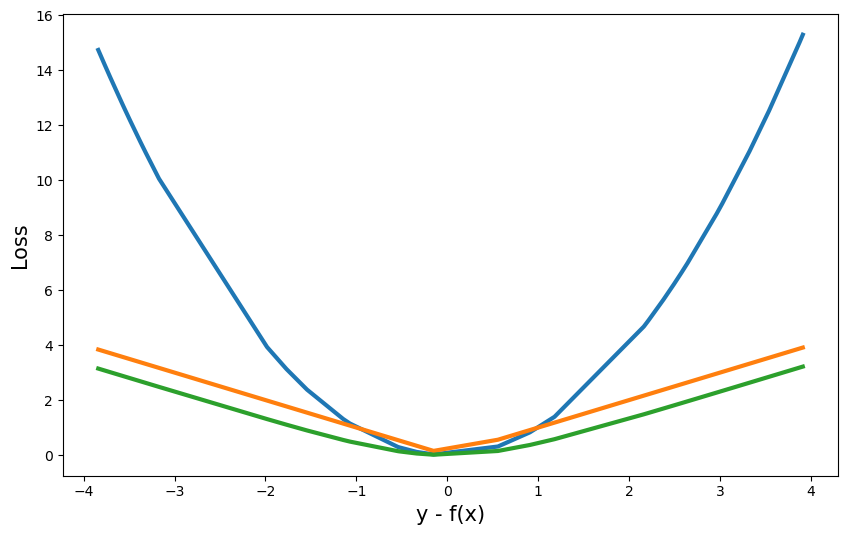

In [81]:
plt.figure(figsize=(10,6))

plt.plot(predict_df['y_fx'], predict_df['MSE'], linewidth = 3)
plt.plot(predict_df['y_fx'], predict_df['MAE'], linewidth = 3)
plt.plot(predict_df['y_fx'], predict_df['Logcosh'], linewidth = 3)
plt.xlabel('y - f(x)', fontsize=15)
plt.ylabel('Loss', fontsize=15);

In [44]:
coeffecients = pd.DataFrame(lr.coef_, X.columns)
coeffecients

,0
Avg. Session Length,25.412488
Time on App,38.041978
Time on Website,0.653562
Length of Membership,60.195211


Если рассматривать с точки зрения мобайл и десктоп, то нахождение клиента в приложении, влияет на прибыль магазина

In [45]:
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,OwnLinearRegression,7.254232,79.245303,8.901983,0.017667,0.987818,-0.220077,1.432741,1.386938
0,LinearRegression,7.261871,79.363796,8.908636,0.017678,0.987800,-0.229788,1.434165,1.388398


# Предобработка данных

In [48]:
data = load_boston()
df_example = pd.DataFrame(data['data'], columns=data['feature_names'])
df_example['PRICE'] = data['target']

df_example = pd.read_csv("BostonHousing.csv")

In [49]:
df_example[:4]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [50]:
df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


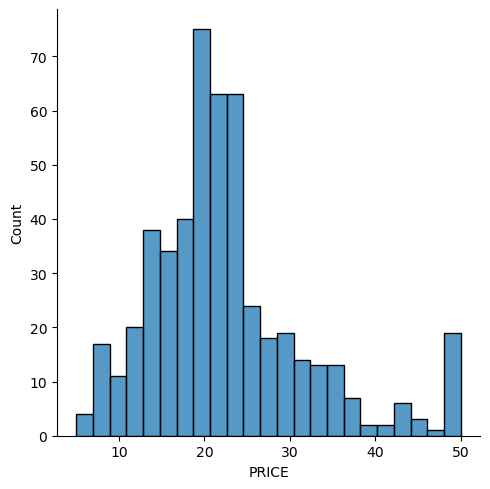

In [51]:
sns.displot(df_example.PRICE);

In [52]:
test_shapiro = stats.shapiro(df_example['PRICE'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.9171746969223022, pvalue=4.939965499209636e-16)
Распределение не нормальное


In [53]:
df_example['PRICE_log'] = np.log(df_example['PRICE'] + 1)

In [82]:
# потенционирование
np.exp(df_example['PRICE_log']) - 1

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE_log, Length: 506, dtype: float64

In [83]:
test_shapiro = stats.shapiro(df_example['PRICE_log'])
print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.9783110022544861, pvalue=7.713074410276022e-07)
Распределение не нормальное


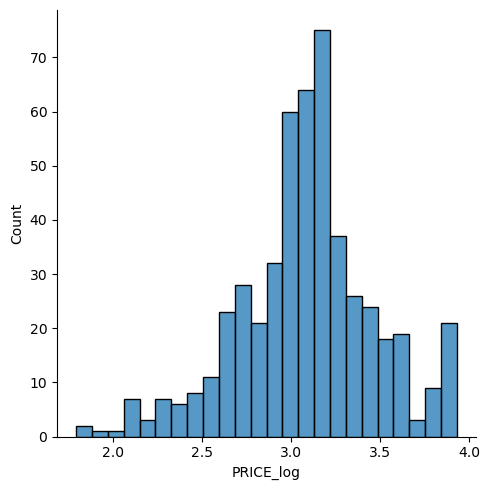

In [84]:
sns.displot(df_example.PRICE_log);

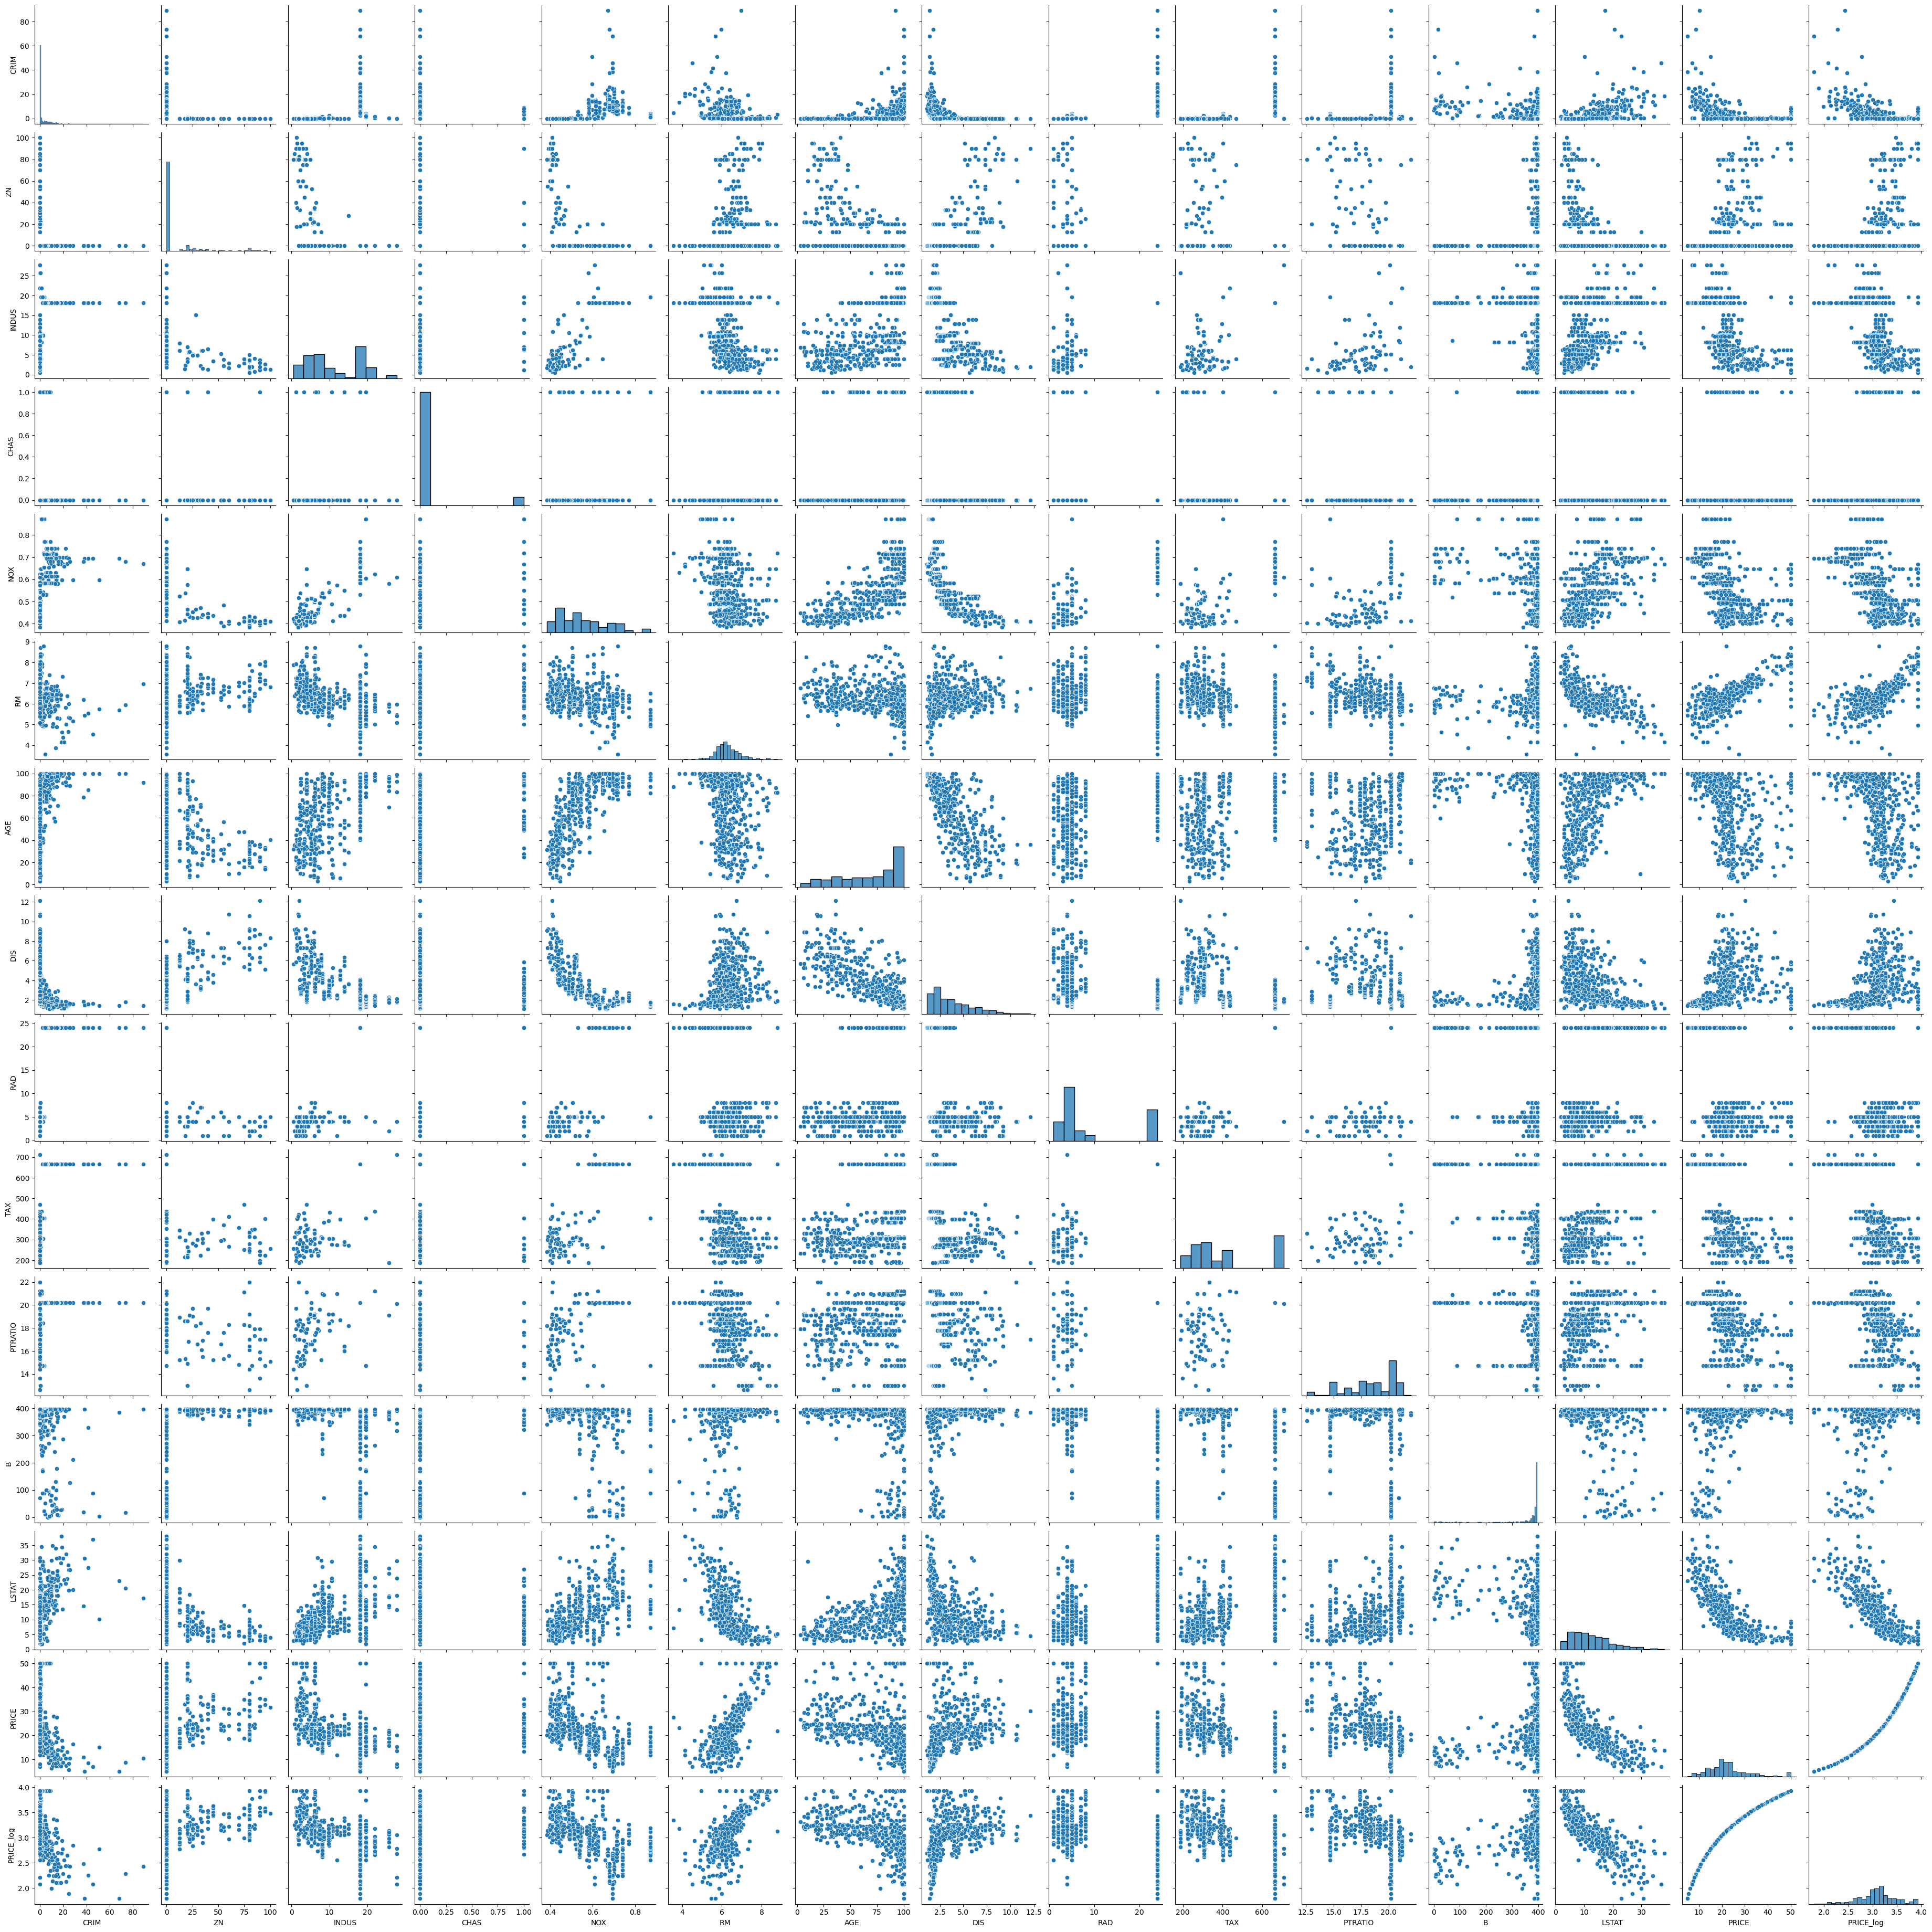

In [85]:
sns.pairplot(df_example);

In [86]:
df_example.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRICE_log
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,3.085437
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.386966
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.791759
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,2.891757
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,3.100092
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,3.258097
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,3.931826


## Масштабирование признаков
### StandardScaler

Логика заключается в том, что из текущего значения на данном признаке мы вычитаем среднее всех значений этого признака и разность делим на стандартное отклонение.

$$x^{j}_{i} = \frac{x^{j}_{i}-\bar{x_{j}}}{\sigma_{j}}$$

Больше подходит для нормально распределенных данных

In [137]:
X = df_example.drop(['PRICE', 'PRICE_log'], axis=1)
y = df_example['PRICE_log'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RAND)

st = StandardScaler()
X_std_train = st.fit_transform(X_train)
X_std_test = st.transform(X_test)

In [109]:
lr = LinearRegression()
lr.fit(X_std_train, y_train)

LinearRegression()

In [110]:
y_pred = lr.predict(X_std_test)

metrics_2 = get_metrics(y_test, y_pred, X_std_test, name='StandardScaler_LR')
metrics_2

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,StandardScaler_LR,0.131932,0.037234,0.192961,0.048643,0.716326,0.224176,4.221415,4.17674


### MinMaxScaler

Признаки приводятся к заданному масштабу, по умолчанию (0,1)

$$x^{j}_{i} = \frac{x^{j}_{i}-m_{j}}{M_{j}-m_{j}}$$


$$m_{j} = min(x^{j}_{1}, x^{j}_{2}, ...,x^{j}_{l})$$

$$M_{j} = max(x^{j}_{1}, x^{j}_{2}, ...,x^{j}_{l})$$

In [111]:
mms = MinMaxScaler()
X_mms_train = mms.fit_transform(X_train)
X_mms_test = mms.transform(X_test)

In [114]:
lr = LinearRegression()
lr.fit(X_mms_train, y_train)

LinearRegression()

In [115]:
y_pred = lr.predict(X_mms_test)

metrics_2 = pd.concat([
    metrics_2,
    get_metrics(y_test, y_pred, X_std_test, name='MinMaxScaler_LR')
])
metrics_2

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,StandardScaler_LR,0.131932,0.037234,0.192961,0.048643,0.716326,0.224176,4.221415,4.176740
0,MinMaxScaler_LR,0.277256,0.131155,0.362153,0.086452,0.000767,3.450306,8.617263,8.777425
0,MinMaxScaler_LR,0.131932,0.037234,0.192961,0.048643,0.716326,0.224176,4.221415,4.176740


In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = lr.predict(X_test)

metrics_2 = pd.concat([
    metrics_2,
    get_metrics(y_test, y_pred, X_test, name='Without_norm_LR')
])
metrics_2

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,StandardScaler_LR,0.131932,0.037234,0.192961,0.048643,0.716326,0.224176,4.221415,4.176740
0,MinMaxScaler_LR,0.277256,0.131155,0.362153,0.086452,0.000767,3.450306,8.617263,8.777425
0,MinMaxScaler_LR,0.131932,0.037234,0.192961,0.048643,0.716326,0.224176,4.221415,4.176740
0,Without_norm_LR,0.131932,0.037234,0.192961,0.048643,0.716326,0.224176,4.221415,4.176740


In [118]:
df_example.shape

(506, 15)

## Кодирование категориальных признаков

### Бинаризация get_dummies

In [119]:
df = pd.read_csv('Credit_Card.csv')

In [120]:
df[:4]

,ID,name,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,Ипатий Брониславович Щукин,M,Высшее,Не замужем/не женат,21,90000.0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
1,2,Кузнецов Фотий Харитонович,M,Высшее,Замужем/женат,74,50000.0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,3,Суворов Георгий Ефимович,M,Высшее,Замужем/женат,88,50000.0,-1,0,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,4,Мирослав Фомич Николаев,M,Основное общее образование,Не замужем/не женат,21,500000.0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [121]:
id_name = df[['ID', 'name']]
df_clean = df.drop(columns=['ID', 'name'])

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20885 entries, 0 to 20884
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         20885 non-null  object 
 1   EDUCATION                   20875 non-null  object 
 2   MARRIAGE                    20845 non-null  object 
 3   AGE                         20885 non-null  int64  
 4   LIMIT_BAL                   20885 non-null  float64
 5   PAY_0                       20885 non-null  int64  
 6   PAY_2                       20885 non-null  int64  
 7   PAY_3                       20885 non-null  int64  
 8   PAY_4                       20885 non-null  int64  
 9   PAY_5                       20885 non-null  int64  
 10  PAY_6                       20885 non-null  int64  
 11  BILL_AMT1                   20885 non-null  float64
 12  BILL_AMT2                   20885 non-null  float64
 13  BILL_AMT3                   208

Чтобы работать с категориальными значениями их можно бинаризовать, то есть как бы из каждого значения сделать столбец. Для таких целей используют pandas.get_dummies()

Если используем, например, линейную регрессию, то drop_first=True в get_dummies(). 

Перед такой бинаризацией желательно заполнить пропуски в данных. Как можем заполнять пропуски для типа object:
- 'None'
- модой (часто встречаемое значение)
- удалять строки с пропусками (не рекомендуется)


**В линейной регрессии с категориальными переменными следует остерегаться ловушки фиктивных переменных.** Ловушка фиктивной переменной - это сценарий, в котором независимые переменные являются мультиколлинеарными - сценарий, в котором две или более переменных сильно коррелированы; Проще говоря, одну переменную можно предсказать, исходя из других. Это может привести к сингулярности модели, а также плохой интерпретируемости весовых коэффициентов

drop_first=True важно использовать, так как это помогает убрать лишний столбец, который был создан при создании фиктивных (бинаризовынных) переменных, например для признака PAY. Следовательно, это уменьшает корреляцию между фиктивными переменными.

In [123]:
df_clean = df_clean.fillna('None')

Чтобы применить бинаризацию, создадим новый датасет, чтобы сохранить исходный

In [124]:
pd.get_dummies(df_clean, columns=['EDUCATION'], drop_first=True)[:5]

,SEX,MARRIAGE,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_Высшее,EDUCATION_Другие,EDUCATION_Основное общее образование,EDUCATION_Среднее общее образование
0,M,Не замужем/не женат,21,90000.0,0,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,0
1,M,Замужем/женат,74,50000.0,0,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0
2,M,Замужем/женат,88,50000.0,-1,0,-1,0,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0
3,M,Не замужем/не женат,21,500000.0,0,0,0,0,0,0,...,40000.0,38000.0,20239.0,13750.0,13770.0,0,0,0,1,0
4,F,Не замужем/не женат,85,100000.0,0,-1,-1,0,0,-1,...,601.0,0.0,581.0,1687.0,1542.0,0,1,0,0,0


In [125]:
df_dummies = pd.get_dummies(df_clean, drop_first=True)
df_dummies[:4]

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_M,EDUCATION_Высшее,EDUCATION_Другие,EDUCATION_Основное общее образование,EDUCATION_Среднее общее образование,MARRIAGE_Замужем/женат,MARRIAGE_Не замужем/не женат
0,21,90000.0,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,5000.0,0,1,1,0,0,0,0,1
1,74,50000.0,0,0,0,0,0,0,46990.0,48233.0,...,1069.0,1000.0,0,1,1,0,0,0,1,0
2,88,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,...,689.0,679.0,0,1,1,0,0,0,1,0
3,21,500000.0,0,0,0,0,0,0,367965.0,412023.0,...,13750.0,13770.0,0,1,0,0,1,0,0,1


### Бинаризация one-hot

In [126]:
df_clean[:4]

,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,M,Высшее,Не замужем/не женат,21,90000.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
1,M,Высшее,Замужем/женат,74,50000.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,M,Высшее,Замужем/женат,88,50000.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,M,Основное общее образование,Не замужем/не женат,21,500000.0,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [127]:
enc = OneHotEncoder(drop='first')
enc.fit(df_clean.select_dtypes('object'))

OneHotEncoder(drop='first')

In [128]:
enc.categories_

[array(['F', 'M'], dtype=object),
 array(['None', 'Высшее', 'Другие', 'Основное общее образование',
        'Среднее общее образование'], dtype=object),
 array(['None', 'Замужем/женат', 'Не замужем/не женат'], dtype=object)]

In [129]:
enc.transform(df_clean.select_dtypes('object')[:5]).toarray()

array([[1., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1.]])

In [130]:
enc.inverse_transform(
    enc.transform(df_clean.select_dtypes('object')[:5]).toarray())

array([['M', 'Высшее', 'Не замужем/не женат'],
       ['M', 'Высшее', 'Замужем/женат'],
       ['M', 'Высшее', 'Замужем/женат'],
       ['M', 'Основное общее образование', 'Не замужем/не женат'],
       ['F', 'Высшее', 'Не замужем/не женат']], dtype=object)

### Кодирование числами 

Данный подход не всегда применим, так как алгоритм может распознавать проставленные числа как возрастающую последовательность: 

- чем больше число, тем выше его показатель. Его можно отлично применять, если вы кодируете какую-либо градацию, например должности на работе: специалист, начальник, директор.

Под данный подход отлично подойдет признак EDUCATION, но для начала заполним пропуски модой

In [131]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit(df_clean.EDUCATION)

LabelEncoder()

In [132]:
le.classes_

array(['None', 'Высшее', 'Другие', 'Основное общее образование',
       'Среднее общее образование'], dtype=object)

In [133]:
le.transform(df_clean.EDUCATION)

array([1, 1, 1, ..., 1, 4, 1])

In [134]:
set(list(zip(df_clean.EDUCATION, le.transform(df_clean.EDUCATION))))

{('None', 0),
 ('Высшее', 1),
 ('Другие', 2),
 ('Основное общее образование', 3),
 ('Среднее общее образование', 4)}

Видим, что по логике нумерация не совсем бьется, так как Высшее меньше по значению, чем Среднее общее образование.
Для таких случаев обычно делают маппинг, если приизнаков не так много. Если их много, то уже желательно применять бинаризацию

In [135]:
dict_education = {
    'None': 0,
    'Высшее': 4,
    'Другие': 1,
    'Основное общее образование': 3,
    'Среднее общее образование': 2
}

df_clean.EDUCATION = df_clean.EDUCATION.map(dict_education)

In [136]:
df_clean[:5]

,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,M,4,Не замужем/не женат,21,90000.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
1,M,4,Замужем/женат,74,50000.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,M,4,Замужем/женат,88,50000.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,M,3,Не замужем/не женат,21,500000.0,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
4,F,4,Не замужем/не женат,85,100000.0,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0


**Если вы будете применять такие алгоритмы как lighgbm, catboost, то они имеют встроенный обработчик категориальных переменных, вам будет необходимо указать только список со столбцами с категориальным типом**